In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 
# Hyper-parameters
num_epochs = 15 
batch_size = 64 
learning_rate = 0.001 
num_classes = 43 

In [3]:
# GTSRB dataset
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.GTSRB(root='./data', split='train', transform=transform, download=True)
test_dataset = datasets.GTSRB(root='./data', split='test', transform=transform, download=True)
# Data loader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


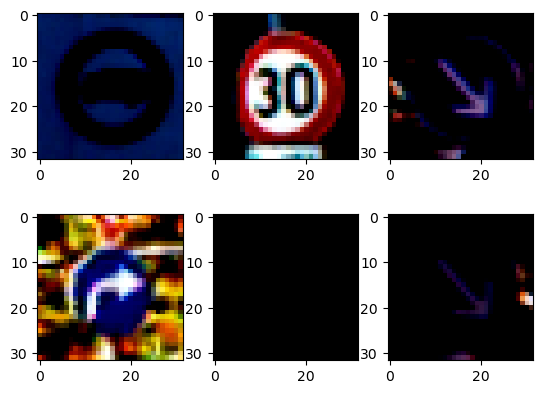

In [4]:

examples = iter(test_loader)
example_data, example_targets = next(examples)

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i].permute(1, 2, 0))  # Reordering dimensions for RGB image
plt.show()

In [5]:

class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.25)
        self.fc1 = nn.Linear(64 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, num_classes)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout(x)
        x = x.view(-1, 64 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

model = CNN(num_classes).to(device)


In [6]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [7]:

total_step = len(train_loader)
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss:.4f}, Accuracy: {100 * correct / total:.2f}%')


Epoch [1/15], Loss: 576.1189, Accuracy: 60.22%
Epoch [2/15], Loss: 120.8417, Accuracy: 91.24%
Epoch [3/15], Loss: 67.7057, Accuracy: 95.09%
Epoch [4/15], Loss: 46.7444, Accuracy: 96.49%
Epoch [5/15], Loss: 34.3022, Accuracy: 97.46%
Epoch [6/15], Loss: 26.9703, Accuracy: 97.98%
Epoch [7/15], Loss: 22.8281, Accuracy: 98.43%
Epoch [8/15], Loss: 18.4609, Accuracy: 98.57%
Epoch [9/15], Loss: 18.4824, Accuracy: 98.58%
Epoch [10/15], Loss: 17.0470, Accuracy: 98.81%
Epoch [11/15], Loss: 14.9628, Accuracy: 98.84%
Epoch [12/15], Loss: 11.8606, Accuracy: 99.15%
Epoch [13/15], Loss: 12.3474, Accuracy: 99.07%
Epoch [14/15], Loss: 14.8082, Accuracy: 98.86%
Epoch [15/15], Loss: 8.8657, Accuracy: 99.34%


In [8]:

model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy of the model on the {total} test images: {100 * correct / total:.2f}%')


Test Accuracy of the model on the 12630 test images: 91.54%
